In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Saving kaggle.json to kaggle.json
 91% 60.0M/66.0M [00:00<00:00, 141MB/s]
100% 66.0M/66.0M [00:00<00:00, 122MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [5]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_curve,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
import seaborn as sns
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier

In [6]:
def metric(y_test,y_pred):
    cm=confusion_matrix(y_test, y_pred)
    tp=cm[1][1] #vrai positifs 
    tn=cm[0][0] #vrai negatifs
    fp=cm[0][1] #faux positifs
    fn=cm[1][0] #faux negatifs
    score=(2*((tp+tn)/y_test.size) + 5*(tp/(fn+tp)))/7 #(2*accuracy + 5*rappel)/7
#     print(f"score : {score} soit {score* 100:.2f}%")
    return float(score)

In [7]:
def KNN_CL(X_tr,y_tr,X_ts,y_ts):
    AUCROC=[]
    mc=[]
    voisins=[]
    for i in range(10):
        voisins.append(i+1)
        knn = KNeighborsClassifier(n_neighbors = i+1)
        knn.fit(X_tr, y_tr)
        y_pred = knn.predict(X_ts)
        print('Precision : {0:0.5f}'.format(precision_score(y_ts , y_pred)))
        print('Recall : {0:0.5f}'.format(recall_score(y_ts , y_pred)))
        print('F1 : {0:0.5f}'.format(f1_score(y_ts , y_pred)))
        print('roc_auc_score : {0:0.5f}'.format(roc_auc_score(y_ts , y_pred)))
        print('metrique personnalisée (MP): {0:0.5f}'.format(metric(y_ts,y_pred)))
        #matrice de confusion
        print(f"\\\\Matrice de confusion ///:- \n {confusion_matrix(y_ts, y_pred)}")
        sns.heatmap(pd.DataFrame(confusion_matrix(y_ts, y_pred)), annot=True, annot_kws={"size": 15}, cmap="winter" ,fmt='g')
        plt.title('Matrice de confusion', y=1.1, fontsize = 15)
        plt.xlabel('Prédit',fontsize = 15)
        plt.ylabel('Réel',fontsize = 15)
        plt.show()
        AUCROC.append(roc_auc_score(y_ts , y_pred))
        mc.append(metric(y_ts,y_pred))
    #courbe de performance
    plt.scatter(voisins,AUCROC,c='red')
    plt.scatter(voisins,mc,c='blue')

Precision : 0.85000
Recall : 0.84158
F1 : 0.84577
roc_auc_score : 0.92066
metrique personnalisée : 0.88669
\\Matrice de confusion ///:- 
 [[56846    15]
 [   16    85]]


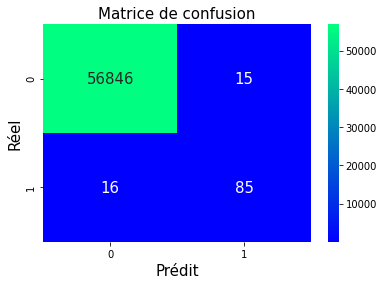

Precision : 0.96386
Recall : 0.79208
F1 : 0.86957
roc_auc_score : 0.89601
metrique personnalisée : 0.85136
\\Matrice de confusion ///:- 
 [[56858     3]
 [   21    80]]


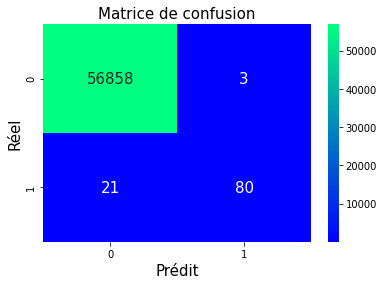

Precision : 0.91111
Recall : 0.81188
F1 : 0.85864
roc_auc_score : 0.90587
metrique personnalisée : 0.86549
\\Matrice de confusion ///:- 
 [[56853     8]
 [   19    82]]


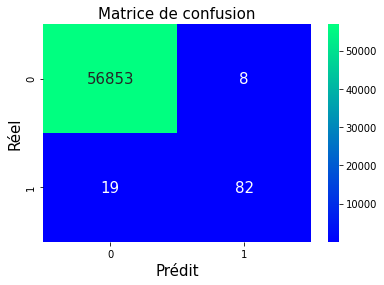

Precision : 0.93023
Recall : 0.79208
F1 : 0.85561
roc_auc_score : 0.89599
metrique personnalisée : 0.85135
\\Matrice de confusion ///:- 
 [[56855     6]
 [   21    80]]


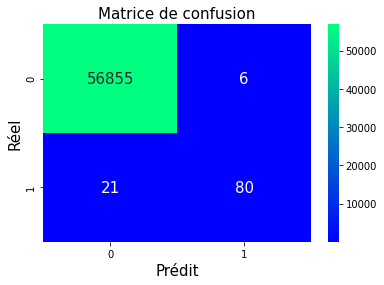

Precision : 0.93103
Recall : 0.80198
F1 : 0.86170
roc_auc_score : 0.90094
metrique personnalisée : 0.85843
\\Matrice de confusion ///:- 
 [[56855     6]
 [   20    81]]


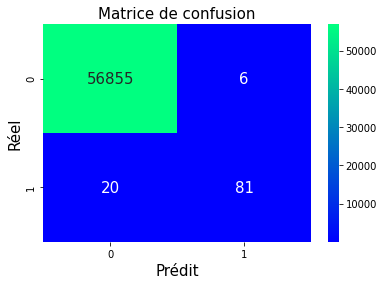

Precision : 0.93976
Recall : 0.77228
F1 : 0.84783
roc_auc_score : 0.88609
metrique personnalisée : 0.83720
\\Matrice de confusion ///:- 
 [[56856     5]
 [   23    78]]


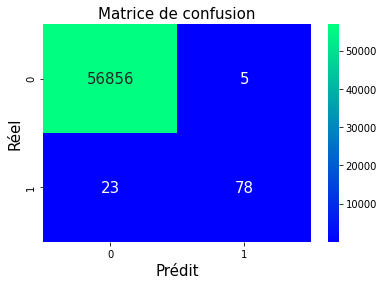

Precision : 0.90909
Recall : 0.79208
F1 : 0.84656
roc_auc_score : 0.89597
metrique personnalisée : 0.85134
\\Matrice de confusion ///:- 
 [[56853     8]
 [   21    80]]


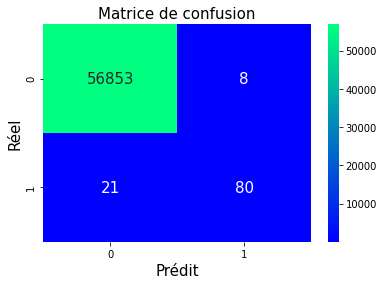

Precision : 0.93750
Recall : 0.74257
F1 : 0.82873
roc_auc_score : 0.87124
metrique personnalisée : 0.81597
\\Matrice de confusion ///:- 
 [[56856     5]
 [   26    75]]


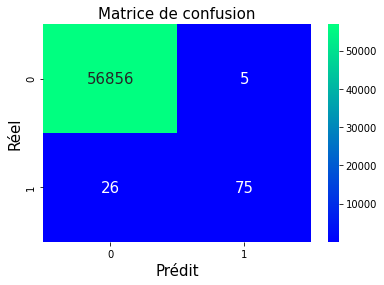

Precision : 0.88506
Recall : 0.76238
F1 : 0.81915
roc_auc_score : 0.88110
metrique personnalisée : 0.83010
\\Matrice de confusion ///:- 
 [[56851    10]
 [   24    77]]


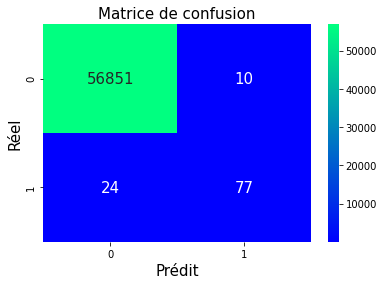

Precision : 0.91463
Recall : 0.74257
F1 : 0.81967
roc_auc_score : 0.87123
metrique personnalisée : 0.81596
\\Matrice de confusion ///:- 
 [[56854     7]
 [   26    75]]


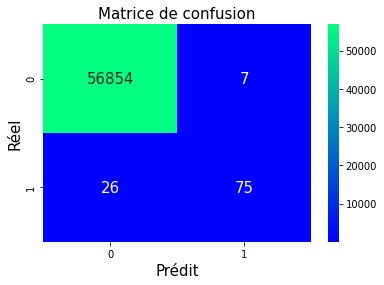

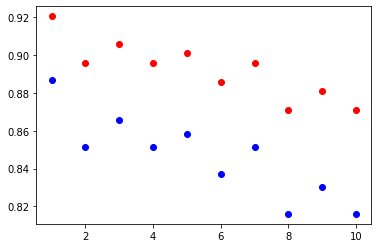

In [8]:
df = pd.read_csv('creditcard.csv').astype(np.float32)
Sc=StandardScaler()
Amount=df["Amount"].values
df["Amount"]=Sc.fit_transform(Amount.reshape(-1,1))
Time=df["Time"].values
df["Time"]=Sc.fit_transform(Time.reshape(-1,1))
x = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

KNN_CL(X_train,Y_train,X_test,Y_test)